In [ ]:
import pandas as pd

# Load the Excel files
group1_df = pd.read_excel("group1.xlsx")
control_df = pd.read_excel("control group1.xlsx")

# Display the first few rows of both datasets to understand structure
group1_df.head(), control_df.head()


(                                                name  datum       umsatz  \
 0                      AGRANA Sales & Marketing GmbH   2024  975244216.0   
 1             Columbus-Cargo Intern. Speditions GmbH   2023   12000000.0   
 2  LKW WALTER Internationale Transportorganisatio...   2024          NaN   
 3                    WIEN ENERGIE International GmbH   2023   14000000.0   
 4                                  LZS Menhofer GmbH   2023          NaN   
 
    bilanzsumme                     A. Fixed assets  \
 0    241200413               {111802212,135366206}   
 1      3842039            {114000,102000,92416.54}   
 2     41628867             {117116000,120192399.7}   
 3     56149450  {11815000,13034760.48,50471238.92}   
 4     13291290     {12907000,12775000,12359040.85}   
 
                   II. Fixed assets  \
 0                              NaN   
 1           {38000,35000,46619.76}   
 2           {36712000,35410329.93}   
 3                    {0.56,0.56,0}   
 4  {1290

<ipython-input-2-9753fe724134>:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group1_df[col].dropna(), label=f'Group 1 - {col}', linestyle="--")


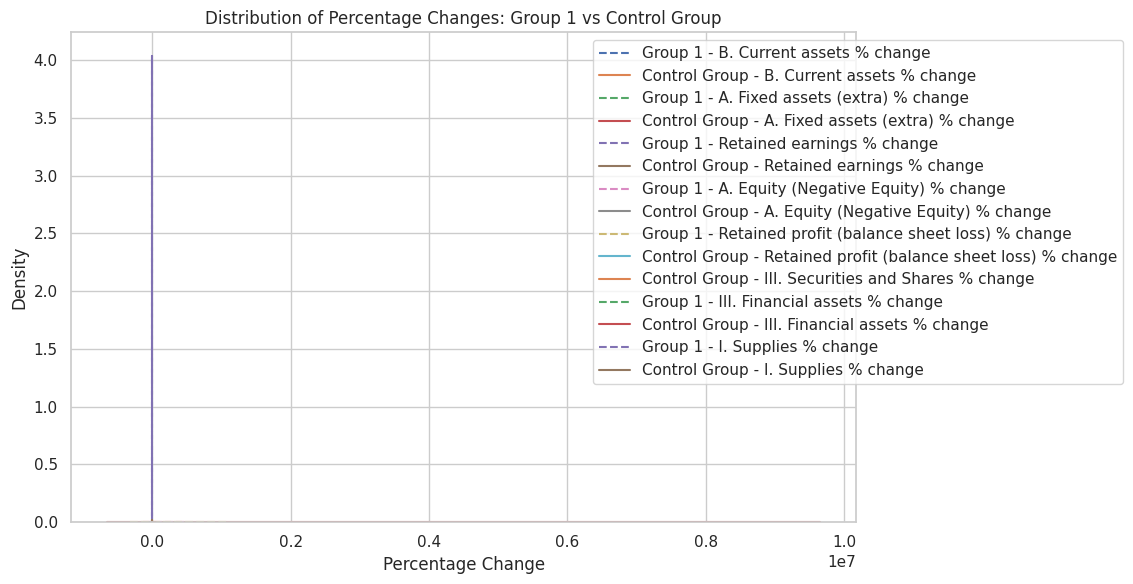

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Clean and prepare percentage change columns for both datasets
percentage_columns = [
    "B. Current assets % change",
    "A. Fixed assets (extra) % change",
    "Retained earnings % change",
    "A. Equity (Negative Equity) % change",
    "Retained profit (balance sheet loss) % change",
    "III. Securities and Shares % change",
    "III. Financial assets % change",
    "I. Supplies % change"
]

# Convert columns to numeric, coercing errors
for col in percentage_columns:
    group1_df[col] = pd.to_numeric(group1_df[col], errors='coerce')
    control_df[col] = pd.to_numeric(control_df[col], errors='coerce')

# 1. Distribution of Percentage Changes: Group 1 vs Control Group
plt.figure(figsize=(12, 6))
for col in percentage_columns:
    sns.kdeplot(group1_df[col].dropna(), label=f'Group 1 - {col}', linestyle="--")
    sns.kdeplot(control_df[col].dropna(), label=f'Control Group - {col}')
plt.title('Distribution of Percentage Changes: Group 1 vs Control Group')
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.tight_layout()
plt.show()


<ipython-input-3-9753fe724134>:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(group1_df[col].dropna(), label=f'Group 1 - {col}', linestyle="--")


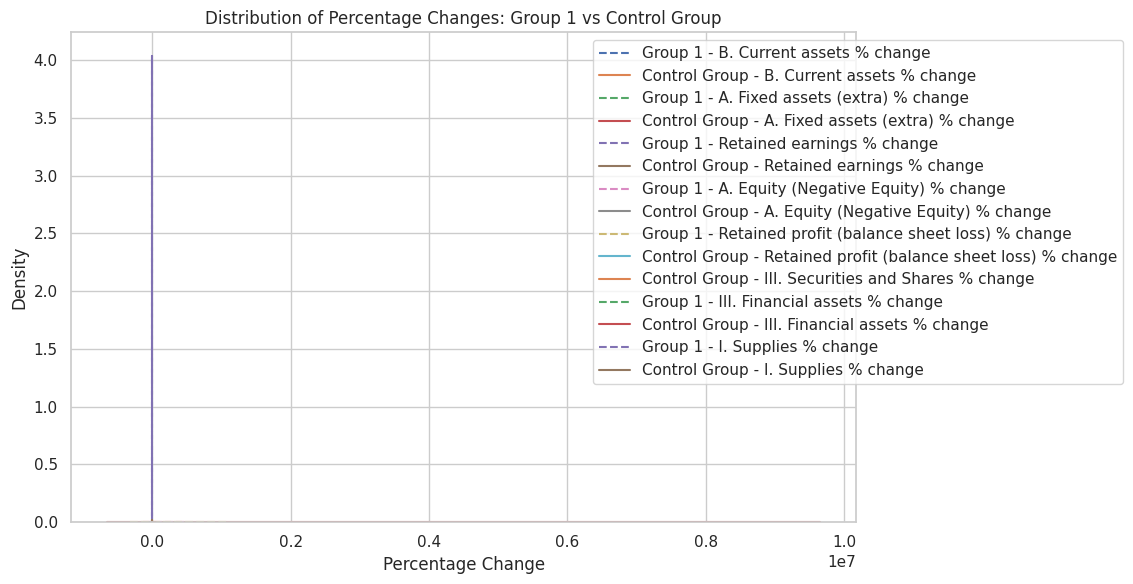

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Clean and prepare percentage change columns for both datasets
percentage_columns = [
    "B. Current assets % change",
    "A. Fixed assets (extra) % change",
    "Retained earnings % change",
    "A. Equity (Negative Equity) % change",
    "Retained profit (balance sheet loss) % change",
    "III. Securities and Shares % change",
    "III. Financial assets % change",
    "I. Supplies % change"
]

# Convert columns to numeric, coercing errors
for col in percentage_columns:
    group1_df[col] = pd.to_numeric(group1_df[col], errors='coerce')
    control_df[col] = pd.to_numeric(control_df[col], errors='coerce')

# 1. Distribution of Percentage Changes: Group 1 vs Control Group
plt.figure(figsize=(12, 6))
for col in percentage_columns:
    sns.kdeplot(group1_df[col].dropna(), label=f'Group 1 - {col}', linestyle="--")
    sns.kdeplot(control_df[col].dropna(), label=f'Control Group - {col}')
plt.title('Distribution of Percentage Changes: Group 1 vs Control Group')
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the files
group1 = pd.read_excel("group1.xlsx")
control = pd.read_excel("control group1.xlsx")

# Convert date/time if available
if 'datum' in group1.columns:
    group1['datum'] = pd.to_datetime(group1['datum'])
if 'datum' in control.columns:
    control['datum'] = pd.to_datetime(control['datum'])

# -----------------------------------------------
# 1. Distribution of Percentage Changes
plt.figure(figsize=(10, 6))
sns.histplot(group1['Percentage Change'], label='Group 1', kde=True, color='blue')
sns.histplot(control['Percentage Change'], label='Control Group', kde=True, color='orange')
plt.title('Distribution of Percentage Changes: Group 1 vs Control Group')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 2. Equity Percentage Change Comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(group1['Equity Percentage Change'], label='Group 1 Equity', fill=True)
sns.kdeplot(control['Equity Percentage Change'], label='Control Group Equity', fill=True)
plt.title('Equity Percentage Change Comparison')
plt.xlabel('Equity % Change')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 3. Trend of Average Percentage Changes over Time: Group 1
if 'datum' in group1.columns:
    group1_avg = group1.groupby('datum')['Percentage Change'].mean()
    plt.figure(figsize=(12, 6))
    group1_avg.plot()
    plt.title('Trend of Avg. % Change Over Time: Group 1')
    plt.ylabel('Avg. Percentage Change')
    plt.xlabel('datum')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# 4. Trend of Average Percentage Changes over Time: Control Group
if 'Date' in control.columns:
    control_avg = control.groupby('datum')['Percentage Change'].mean()
    plt.figure(figsize=(12, 6))
    control_avg.plot(color='green')
    plt.title('Trend of Avg. % Change Over Time: Control Group')
    plt.ylabel('Avg. Percentage Change')
    plt.xlabel('datum')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# 5. Comparison of Asset Categories
plt.figure(figsize=(12, 6))
group_asset_counts = group1['Asset Category'].value_counts(normalize=True)
control_asset_counts = control['Asset Category'].value_counts(normalize=True)

df_compare = pd.DataFrame({
    'Group 1': group_asset_counts,
    'Control Group': control_asset_counts
}).fillna(0)

df_compare.plot(kind='bar', figsize=(12, 6))
plt.title('Asset Category Comparison: Group 1 vs Control Group')
plt.ylabel('Proportion')
plt.xlabel('Asset Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Percentage Change'

<Figure size 1000x600 with 0 Axes>

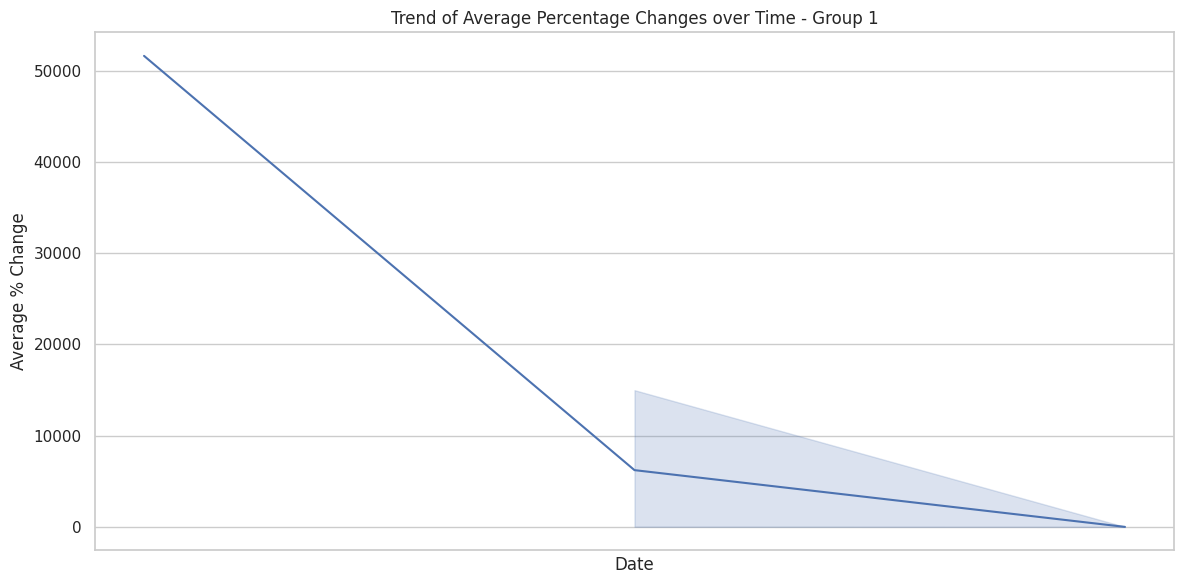

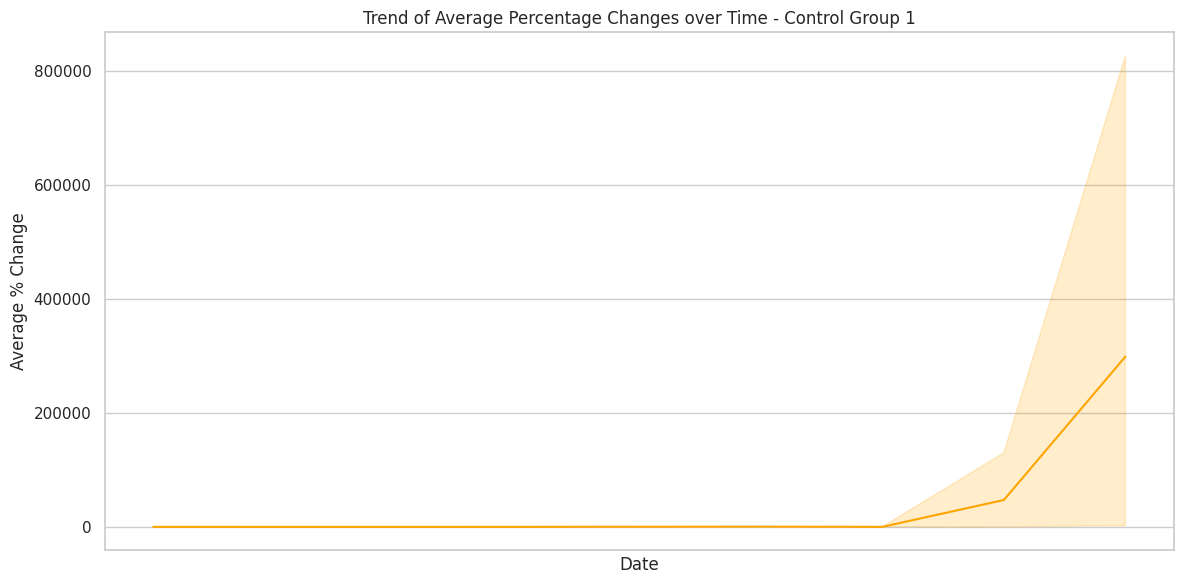

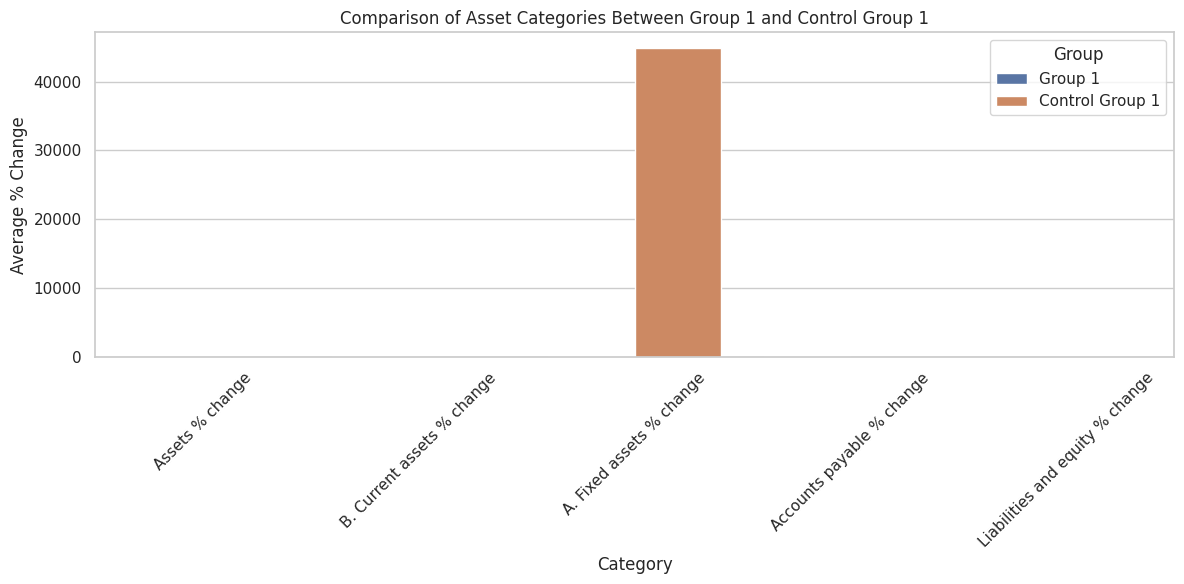

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel files
group1 = pd.read_excel("group1.xlsx")
control = pd.read_excel("control group1.xlsx")

# Clean column names to ensure consistency
group1.columns = group1.columns.str.strip()
control.columns = control.columns.str.strip()

# Ensure 'datum' is datetime
group1['datum'] = pd.to_datetime(group1['datum'], errors='coerce')
control['datum'] = pd.to_datetime(control['datum'], errors='coerce')

# Get only percentage change columns and ensure they are numeric
pct_change_cols = [col for col in group1.columns if col.endswith('% change')]
group1[pct_change_cols] = group1[pct_change_cols].apply(pd.to_numeric, errors='coerce')
control[pct_change_cols] = control[pct_change_cols].apply(pd.to_numeric, errors='coerce')

# ---- 1. Trend of Average Percentage Changes over Time: Group 1 ----
group1['Average % Change'] = group1[pct_change_cols].mean(axis=1)
plt.figure(figsize=(12, 6))
sns.lineplot(x=group1['datum'], y=group1['Average % Change'])
plt.title('Trend of Average Percentage Changes over Time - Group 1')
plt.xlabel('Date')
plt.ylabel('Average % Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- 2. Trend of Average Percentage Changes over Time: Control Group 1 ----
control['Average % Change'] = control[pct_change_cols].mean(axis=1)
plt.figure(figsize=(12, 6))
sns.lineplot(x=control['datum'], y=control['Average % Change'], color='orange')
plt.title('Trend of Average Percentage Changes over Time - Control Group 1')
plt.xlabel('Date')
plt.ylabel('Average % Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- 3. Comparison of Asset Categories between Group 1 and Control Group 1 ----
selected_assets = [
    'Assets % change',
    'B. Current assets % change',
    'A. Fixed assets % change',
    'Accounts payable % change',
    'Liabilities and equity % change'
]

group1_means = group1[selected_assets].mean()
control_means = control[selected_assets].mean()

comparison_df = pd.DataFrame({
    'Group 1': group1_means,
    'Control Group 1': control_means
}).reset_index().rename(columns={'index': 'Category'})

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df.melt(id_vars='Category', var_name='Group', value_name='Average % Change'),
            x='Category', y='Average % Change', hue='Group')
plt.title('Comparison of Asset Categories Between Group 1 and Control Group 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


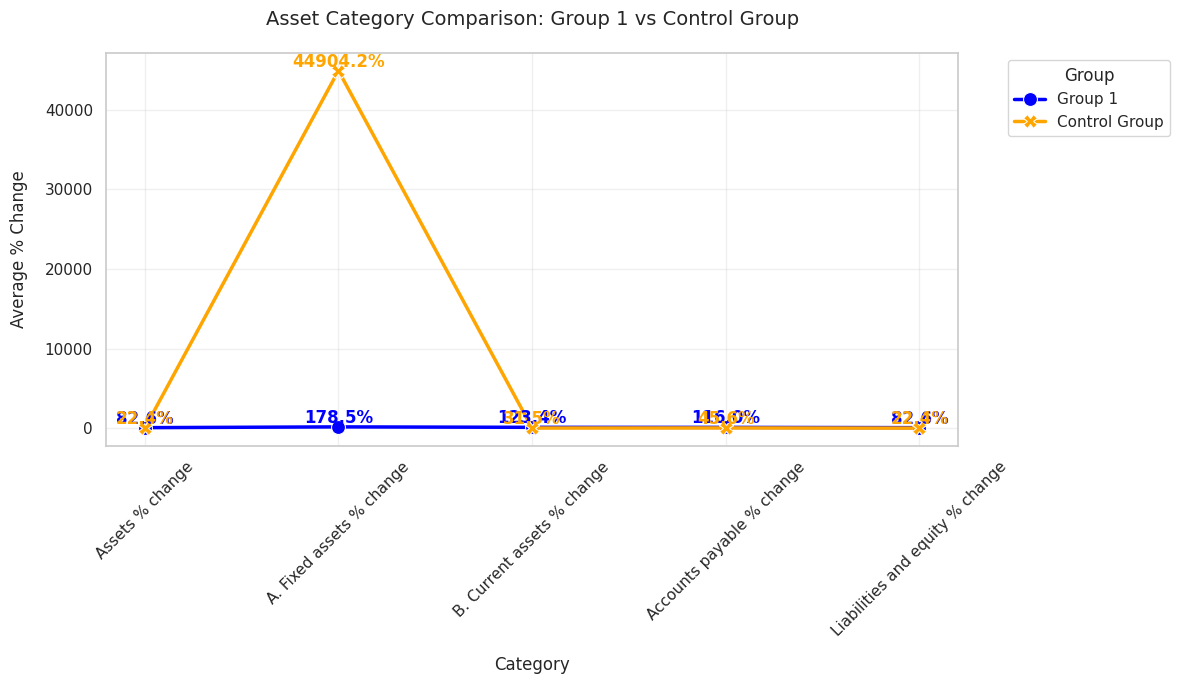

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=melted_df,
             x='Category',
             y='Average % Change',
             hue='Group',
             style='Group',
             markers=True,
             dashes=False,
             linewidth=2.5,
             markersize=10,
             palette=['blue', 'orange'])

plt.title('Asset Category Comparison: Group 1 vs Control Group', pad=20, fontsize=14)
plt.xlabel('Category', labelpad=12)
plt.ylabel('Average % Change', labelpad=12)
plt.xticks(rotation=45)

# Add value labels
for line, name in zip(plt.gca().get_lines(), ['Group 1', 'Control Group']):
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y+5, f'{y:.1f}%',
                color=line.get_color(),
                ha='center',
                va='bottom',
                fontweight='bold')

plt.grid(True, alpha=0.3)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-21-b4e55eff665d>:2: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=melted_df,
<ipython-input-21-b4e55eff665d>:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=melted_df,
<ipython-input-21-b4e55eff665d>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.pointplot(data=melted_df,


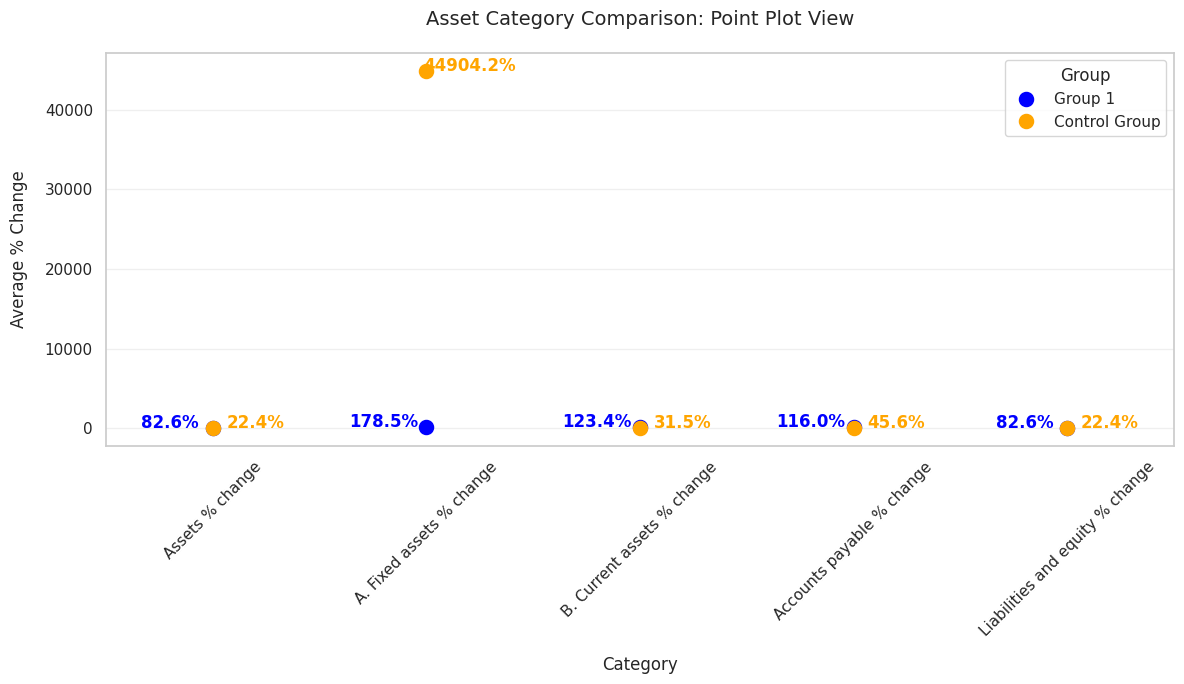

In [ ]:
plt.figure(figsize=(12, 7))
sns.pointplot(data=melted_df,
              x='Category',
              y='Average % Change',
              hue='Group',
              palette=['blue', 'orange'],
              join=False,
              scale=1.5,
              errwidth=0)

plt.title('Asset Category Comparison: Point Plot View', pad=20, fontsize=14)
plt.xlabel('Category', labelpad=12)
plt.ylabel('Average % Change', labelpad=12)
plt.xticks(rotation=45)

# Add value labels
for i, category in enumerate(comparison_df['Category']):
    plt.text(i-0.2, comparison_df['Group 1'][i]+3, f"{comparison_df['Group 1'][i]:.1f}%",
             ha='center', color='blue', fontweight='bold')
    plt.text(i+0.2, comparison_df['Control Group'][i]+3, f"{comparison_df['Control Group'][i]:.1f}%",
             ha='center', color='orange', fontweight='bold')

plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Prepare data (calculate min/max/mean for each category)
metrics = ['min', 'max', 'mean']
group1_stats = group1[selected_assets].describe().loc[metrics]
control_stats = control[selected_assets].describe().loc[metrics]

fig = go.Figure()

for i, category in enumerate(selected_assets):
    fig.add_trace(go.Candlestick(
        x=[f"Group 1<br>{category}", f"Control<br>{category}"],
        open=[group1_stats.loc['min', category], control_stats.loc['min', category]],
        high=[group1_stats.loc['max', category], control_stats.loc['max', category]],
        low=[group1_stats.loc['min', category], control_stats.loc['min', category]],
        close=[group1_stats.loc['mean', category], control_stats.loc['mean', category]],
        name=category,
        increasing_line_color='blue',
        decreasing_line_color='orange'
    ))

fig.update_layout(
    title='<b>Candlestick Comparison of Asset Categories</b><br>Group 1 vs Control Group',
    yaxis_title='Percentage Change (%)',
    xaxis_title='Category',
    hovermode="x unified",
    height=600,
    template='plotly_white'
)

fig.show()

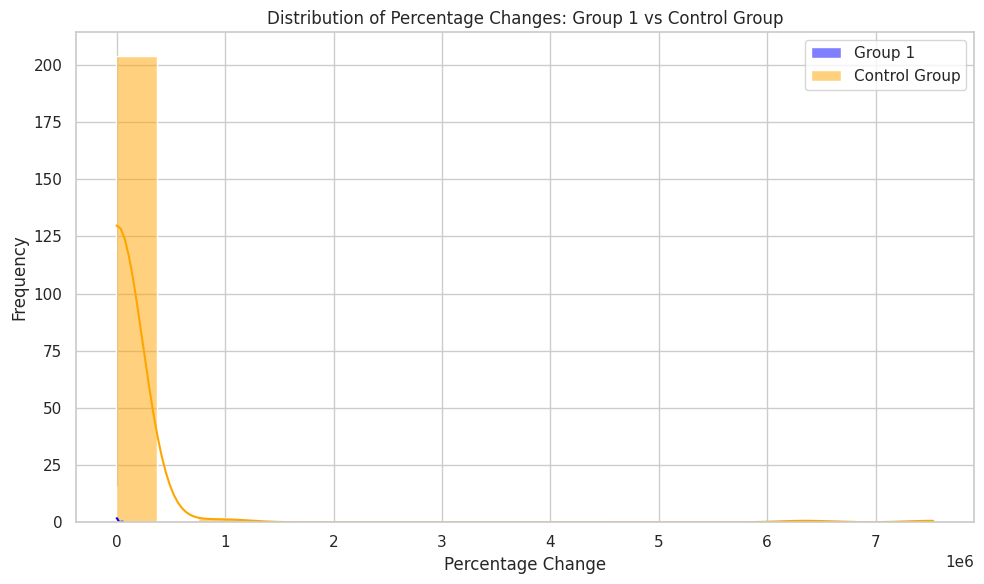

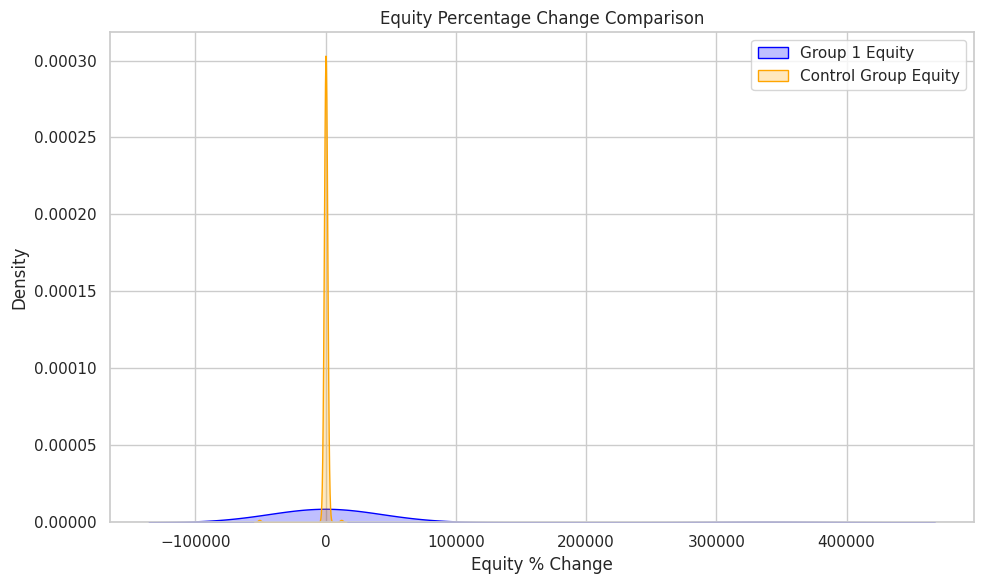

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load files
group1 = pd.read_excel("group1.xlsx")
control = pd.read_excel("control group1.xlsx")

# Clean column names
group1.columns = group1.columns.str.strip()
control.columns = control.columns.str.strip()

# Convert 'datum' to datetime
group1['datum'] = pd.to_datetime(group1['datum'], errors='coerce')
control['datum'] = pd.to_datetime(control['datum'], errors='coerce')

# Identify all percentage change columns
pct_change_cols = [col for col in group1.columns if col.endswith('% change')]
group1[pct_change_cols] = group1[pct_change_cols].apply(pd.to_numeric, errors='coerce')
control[pct_change_cols] = control[pct_change_cols].apply(pd.to_numeric, errors='coerce')

# Create 'Average % Change' as proxy for overall 'Percentage Change'
group1['Percentage Change'] = group1[pct_change_cols].mean(axis=1)
control['Percentage Change'] = control[pct_change_cols].mean(axis=1)

# -----------------------------------------------
# 1. Distribution of Percentage Changes
plt.figure(figsize=(10, 6))
sns.histplot(group1['Percentage Change'], label='Group 1', kde=True, color='blue', bins=20)
sns.histplot(control['Percentage Change'], label='Control Group', kde=True, color='orange', bins=20)
plt.title('Distribution of Percentage Changes: Group 1 vs Control Group')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 2. Equity Percentage Change Comparison
equity_col = 'A. Equity (Negative Equity) % change'

plt.figure(figsize=(10, 6))
sns.kdeplot(group1[equity_col], label='Group 1 Equity', fill=True, color='blue')
sns.kdeplot(control[equity_col], label='Control Group Equity', fill=True, color='orange')
plt.title('Equity Percentage Change Comparison')
plt.xlabel('Equity % Change')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


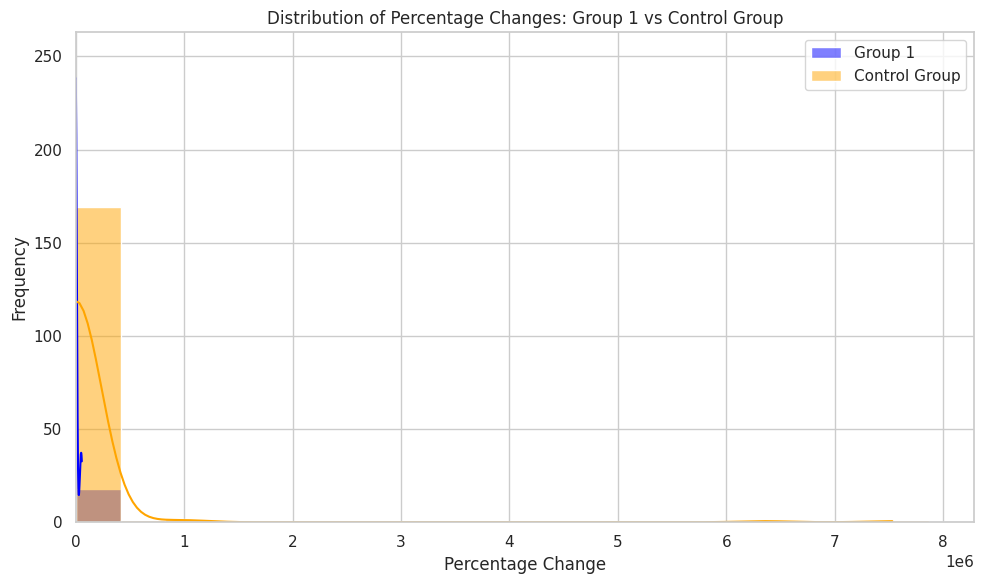

In [ ]:
# Calculate max value across both datasets for right limit
combined_max = max(group1['Percentage Change'].max(), control['Percentage Change'].max())
buffer = combined_max * 0.1  # Add 10% buffer to the right

# Calculate min value across both datasets
combined_min = min(group1['Percentage Change'].min(), control['Percentage Change'].min())
left_limit = -10  # Your desired starting point for x-axis

# Plot with custom x-axis limits
plt.figure(figsize=(10, 6))
sns.histplot(group1['Percentage Change'],
             label='Group 1',
             kde=True,
             color='blue',
             bins=20,
             binrange=(left_limit, combined_max + buffer))

sns.histplot(control['Percentage Change'],
             label='Control Group',
             kde=True,
             color='orange',
             bins=20,
             binrange=(left_limit, combined_max + buffer))

plt.title('Distribution of Percentage Changes: Group 1 vs Control Group')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis limits (using -10 as requested, though your example shows -100)
plt.xlim(left_limit, combined_max + buffer)

# Adjust y-axis to account for the expanded x-axis range
current_ylim = plt.ylim()
plt.ylim(0, current_ylim[1] * 1.05)  # Add 5% buffer to top of y-axis

plt.tight_layout()
plt.show()

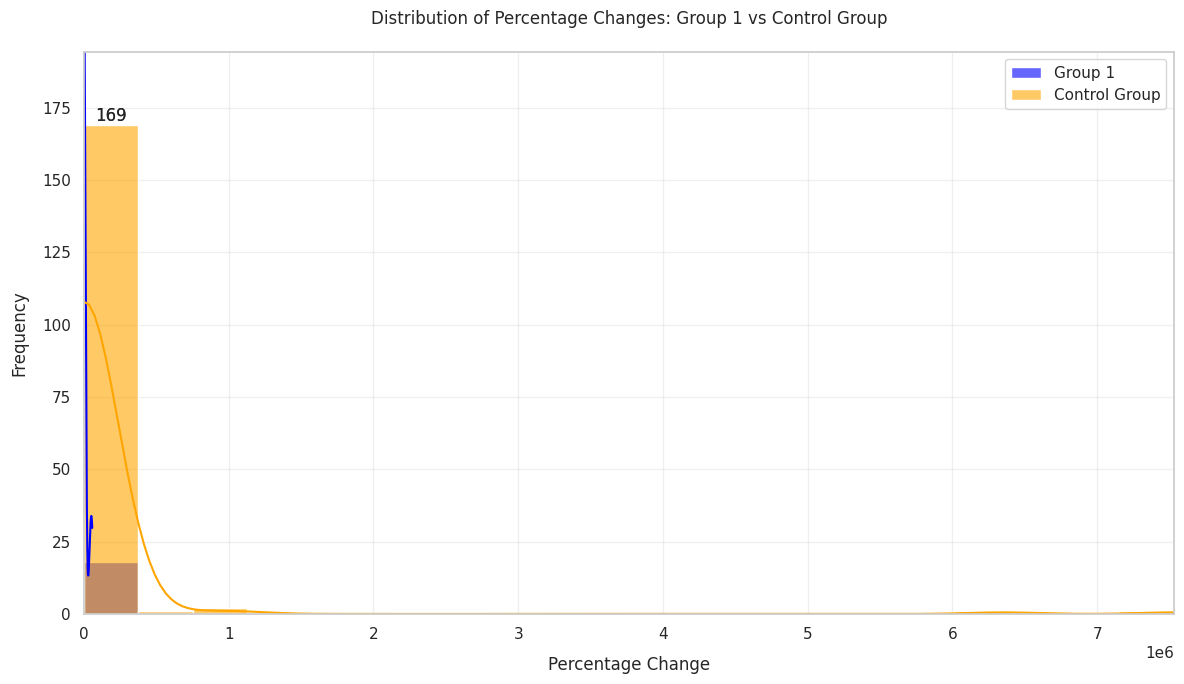

In [ ]:
# Calculate value ranges
combined_max = max(group1['Percentage Change'].max(), control['Percentage Change'].max())
combined_min = min(group1['Percentage Change'].min(), control['Percentage Change'].min())
left_limit = -10  # Your requested starting point

# Calculate optimal bin width
data_range = combined_max - left_limit
bin_width = max(1, data_range/20)  # Ensure at least 1% bin width
bin_count = int(data_range/bin_width)

# Plot with adjusted parameters
plt.figure(figsize=(12, 7))  # Slightly larger figure

# Plot Group 1 first (blue) to ensure it's fully visible
hist1 = sns.histplot(group1['Percentage Change'],
                    label='Group 1',
                    kde=True,
                    color='blue',
                    bins=bin_count,
                    binrange=(left_limit, combined_max),
                    alpha=0.6)

# Then plot Control Group (orange)
hist2 = sns.histplot(control['Percentage Change'],
                    label='Control Group',
                    kde=True,
                    color='orange',
                    bins=bin_count,
                    binrange=(left_limit, combined_max),
                    alpha=0.6)

plt.title('Distribution of Percentage Changes: Group 1 vs Control Group', pad=20)
plt.xlabel('Percentage Change', labelpad=10)
plt.ylabel('Frequency', labelpad=10)

# Adjust y-axis limit based on the tallest bar
max_freq = max(max([p.get_height() for p in hist1.patches]),
               max([p.get_height() for p in hist2.patches]))
plt.ylim(0, max_freq * 1.15)  # 15% buffer above tallest bar

plt.xlim(left_limit, combined_max)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels to highest bars if needed
for patch in hist1.patches + hist2.patches:
    if patch.get_height() > max_freq * 0.8:  # Label only tall bars
        hist1.annotate(f"{int(patch.get_height())}",
                      (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()

ValueError: max() arg is an empty sequence

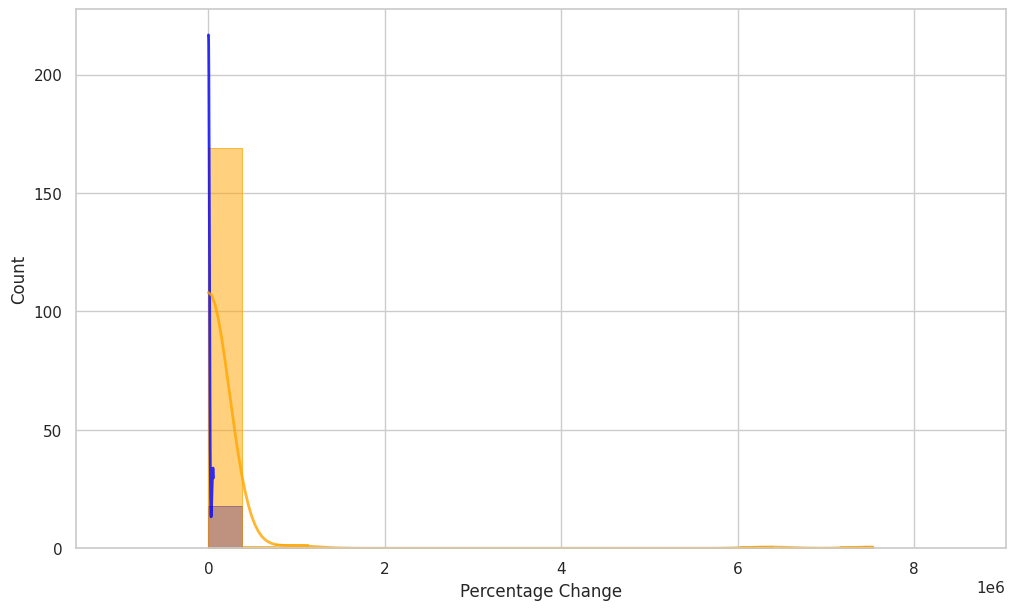

In [ ]:
# Set up the figure with more control over spacing
plt.figure(figsize=(12, 7))

# Calculate optimal parameters
data_range = max(group1['Percentage Change'].max(), control['Percentage Change'].max()) - (-10)
bin_width = max(1, data_range/20)  # Reasonable bin width
bin_count = int(data_range/bin_width)
center_point = (-10 + data_range)/2  # Calculate center point

# Plot histograms with adjusted parameters
hist1 = sns.histplot(group1['Percentage Change'],
                    label='Group 1',
                    kde=True,
                    color='blue',
                    bins=bin_count,
                    binrange=(-10, data_range-10),
                    element='step',  # Cleaner histogram style
                    alpha=0.5,
                    edgecolor='blue',
                    linewidth=0.5)

hist2 = sns.histplot(control['Percentage Change'],
                    label='Control Group',
                    kde=True,
                    color='orange',
                    bins=bin_count,
                    binrange=(-10, data_range-10),
                    element='step',
                    alpha=0.5,
                    edgecolor='orange',
                    linewidth=0.5)

# Enhance KDE lines
for line in hist1.lines:
    line.set_linewidth(2)
    line.set_alpha(0.8)

for line in hist2.lines:
    line.set_linewidth(2)
    line.set_alpha(0.8)

# Adjust plot area to center the bars
ax = plt.gca()
x_padding = data_range * 0.2  # 20% padding on each side
plt.xlim(-10 - x_padding, data_range-10 + x_padding)

# Set y-axis with buffer
max_freq = max(max([p.get_height() for p in hist1.patches]),
               max([p.get_height() for p in hist2.patches]))
plt.ylim(0, max_freq * 1.25)

# Add labels and title
plt.title('Distribution of Percentage Changes\nGroup 1 vs Control Group', pad=20, fontsize=14)
plt.xlabel('Percentage Change', labelpad=10)
plt.ylabel('Frequency', labelpad=10)

# Add legend and grid
plt.legend(framealpha=1)
plt.grid(True, axis='y', alpha=0.3)

# Adjust spines to frame the plot
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color('gray')

plt.tight_layout()
plt.show()